In [7]:
# Yongkang Liu
import sys # modules in sys.path directories's are all available for import
sys.path.append('./DevelopedMethods')
from preprocessing import * # import our pre-processed dataset + imports.py (np, pd, df, df_train, X_train_balanced etc.)

In [71]:
#Instantiating KMeans classifier
ccfd_Kmeans = KMeans(n_clusters=2, random_state=4) # 1 cluster for fraud, 1 cluster for legit

#Training the model
ccfd_Kmeans.fit(X_train_balanced)

label_clustered = ccfd_Kmeans.labels_
print(label_clustered)

#Using newly trained model with X_test_balanced to predict for Credit Card Fraud
KMeans_predictions = ccfd_Kmeans.predict(X_test_balanced)

#Evaluating accuracy of model by comparing predicted labels with y_test values (actual)
score_gnb = metrics.accuracy_score(y_test_balanced, KMeans_predictions)

#Displaying final accuracy score
"Accuracy Score: ", score_gnb

[1 0 0 ... 1 0 1]


('Accuracy Score: ', 0.5855201358446939)

# Plot Clusters in 2D space (Scatter Plot)

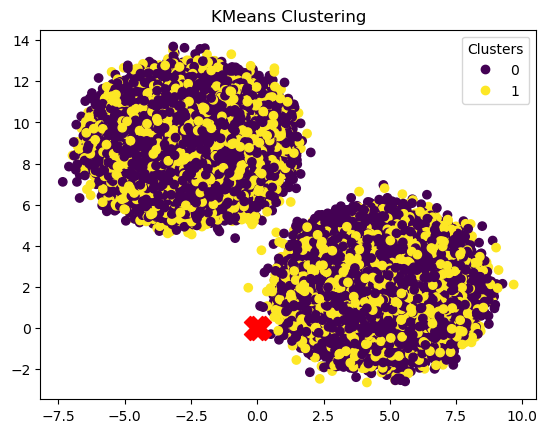

In [77]:
X, y = make_blobs(n_samples=len(X_train_balanced), centers=2, random_state=42) # sklearn.datasets
scatter = plt.scatter(X[:, 0], X[:, 1], c=label_clustered, cmap='viridis', marker='o') # create scatter plot
plt.scatter(ccfd_Kmeans.cluster_centers_[:, 0], ccfd_Kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Cluster centers
plt.title('KMeans Clustering')
plt.legend(*scatter.legend_elements(), title="Clusters") # cluster color legend
plt.show()

# Feature importance Analysis K-Means Clustering
K-Means is an unsupervised algorithm, so it doesn’t directly compute feature importance. However, you can analyze feature contributions indirectly:
Approach: Measure variance by feature.
Features with higher variance often influence the clustering process more significantly.
Scale your data (e.g., using StandardScaler) before clustering to ensure all features contribute equally.
Compute feature means for each cluster and analyze how features differ between clusters.
```# Example: Calculate feature variance within clusters
cluster_centers = kmeans.cluster_centers_
feature_importance = np.std(cluster_centers, axis=0)  # Variance of feature means
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
```